1. Возьмите датасет Mortality and Water Hardness
www.kaggle.com...r-hardness

Дополнительно будет выложен в ЛК
В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

2 Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

    Построить точечный график
    Рассчитать коэффициенты корреляции Пирсона и Спирмена
    Построить модель линейной регрессии
    Рассчитать коэффициент детерминации
    Вывести график остатков


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('water.csv')
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


<AxesSubplot:xlabel='mortality', ylabel='hardness'>

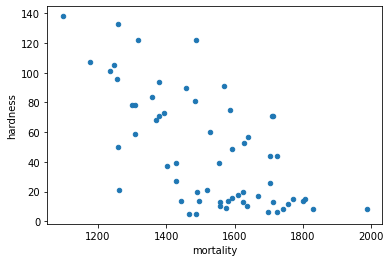

In [4]:
df.plot(kind='scatter', x='mortality', y='hardness')

In [5]:
df[['mortality', 'hardness']].corr() #коэффициент корреляции Пирсона

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [6]:
df[['mortality', 'hardness']].corr(method='spearman') #коэффициент корреляции Спирмена

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [9]:
X = df[['hardness']]
y = df['mortality']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [47]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [48]:
model.coef_

array([-3.28204413])

In [49]:
model.intercept_

1681.6276209577732

In [50]:
y_pred = model.predict(X_test)
y_pred

array([1337.01298764, 1648.80717969, 1635.67900318, 1537.21767938,
       1425.62817906, 1615.98673842, 1245.11575209, 1435.47431145,
       1612.70469429, 1661.9353562 ])

In [51]:
res_df = X_test.copy()
res_df['y_pred'] = y_pred
res_df['y_test'] = y_test
res_df['e'] = y_test - y_pred
res_df

,hardness,y_pred,y_test,e
0,105,1337.012988,1247,-90.012988
5,10,1648.807180,1558,-90.807180
46,14,1635.679003,1495,-140.679003
31,44,1537.217679,1702,164.782321
13,78,1425.628179,1307,-118.628179
55,20,1615.986738,1625,9.013262
34,133,1245.115752,1259,13.884248
49,75,1435.474311,1587,151.525689
12,21,1612.704694,1519,-93.704694
40,6,1661.935356,1696,34.064644


In [52]:
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации

0.583655258547394

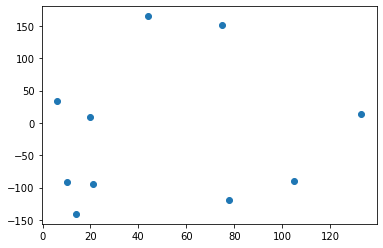

In [53]:
plt.scatter(X_test, y_test - y_pred) #график остатков


Исходя из коэффициента корреляции (-0,65) прослеживается обратная зависимость между смертностью и содержанием кальция в воде. Но данных очень мало и делать какие-либо выводы из них не очень правильно.

3 Задание.
Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

    Разделить данные на 2 группы
    Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности


In [58]:
df_South = df[df.location == 'South']
df_South.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73


In [57]:
df_North = df[df.location == 'North']
df_North.head()

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15


<AxesSubplot:xlabel='mortality', ylabel='hardness'>

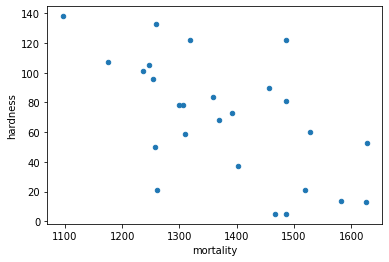

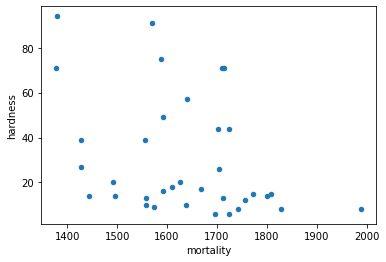

In [59]:
df_South.plot(kind='scatter', x='mortality', y='hardness')  #для юга
df_North.plot(kind='scatter', x='mortality', y='hardness')  #для севера

Если сравнить графики, то график юга схож с общим графиком. А вот, график севера отличается от них. На графике северных городов не прослеживается сильная зависимость смертности от жесткости воды.

In [62]:
df_South[['mortality', 'hardness']].corr() #для юга

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [61]:
df_North[['mortality', 'hardness']].corr() #для севера

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [63]:
df_South[['mortality', 'hardness']].corr(method='spearman') #для юга

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [64]:
df_North[['mortality', 'hardness']].corr(method='spearman') #для севера

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


Коэффициент корреляции для южных городов схож с коэффициентом для всех городов. Но для северных городов коэффициент корреляции ниже и его уровень низкий.

In [66]:
X_s = df_South[['hardness']] #для юга
y_s = df_South['mortality']

In [103]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y_s, test_size=0.10, random_state=42)

In [104]:
model_s = LinearRegression()
model_s.fit(X_train_s, y_train_s)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [105]:
model_s.coef_

array([-2.1645425])

In [106]:
model_s.intercept_

1529.143749365289

In [107]:
y_pred_s = model_s.predict(X_test_s)
y_pred_s

array([1265.06956433, 1518.32103686, 1301.86678684])

In [108]:
model_s.score(X_test_s, y_test_s) # метод возвращает значение коэффициента детерминации для юга

0.7724212353112112

In [109]:
X_n = df_North[['hardness']] #для севера
y_n = df_North['mortality']

In [110]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_n, y_n, test_size=0.10, random_state=42)

In [111]:
model_n = LinearRegression()
model_n.fit(X_train_n, y_train_n)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [112]:
model_n.coef_

array([-1.822715])

In [113]:
model_n.intercept_

1687.7073646127963

In [118]:
y_pred_n = model_n.predict(X_test_n)
y_pred_n

array([1673.12564463, 1671.30292963, 1662.18935464, 1676.77107462])

In [119]:
model_n.score(X_test_n, y_test_n) # метод возвращает значение коэффициента детерминации для севера

0.032340393386281474

Коэффициент детерминации для южных городов достаточно высок. Но для северных городов он приближен к нулю и это означает что линейной зависимости между величинами нет

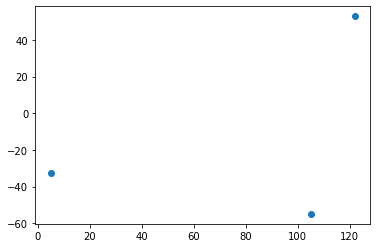

In [121]:
plt.scatter(X_test_s, y_test_s - y_pred_s) #график остатков для юга

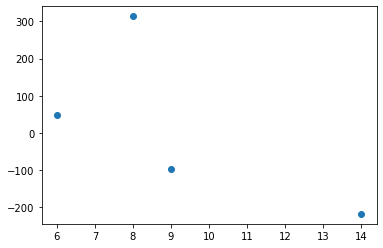

In [122]:
plt.scatter(X_test_n, y_test_n - y_pred_n) #график остатков для севера

Для южных городов сохраняется аналогичная зависимость с общими данными. Для северных же, совсем не сохраняется. 
Исходя из полученных данных можно делать вывод, что прямой связи между жесткостью воды и смертностью в городах Англии и Уэльса нет. Может быть в воде южных городов помимо кальция содержиться ещё какой-то эленмент, который влияет на здоровье? И содержание этого элемента в воде напрямую связанно с содержанием кальция